# Surprise Housing Case Study

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

### Also, determine the optimal value of lambda for ridge and lasso regression.


## Step 1: Importing required libraries and understanding data

### Step 1.1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import datetime

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Step 1.2: Reading and Understanding the Data

In [3]:
housingData = pd.read_csv('train.csv')
housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housingData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
housingData.shape

(1460, 81)

In [6]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
categoricalCols = []
numCols = []

def distributeColumns(df):
    categoricalCols.clear()
    for col in df.columns:
        if housingData[col].dtypes == 'object':
            categoricalCols.append(col)  
        else:
            numCols.append(col)

    print("Categoric columns: ", categoricalCols)
    print("\n")
    print("Numeric columns: ", numCols)

In [8]:
distributeColumns(housingData)

Categoric columns:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Numeric columns:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'Gar

## Step 2: Data manipulation and cleaning


### 2.1 Handle empty data

In [9]:
for (columnName, colData) in housingData.iteritems(): 
    missingDataCount = (housingData[columnName].isna().sum() / housingData.shape[0]) * 100
    if(missingDataCount > 0 ):
        print(columnName, " - ", missingDataCount)

LotFrontage  -  17.73972602739726
Alley  -  93.76712328767123
MasVnrType  -  0.547945205479452
MasVnrArea  -  0.547945205479452
BsmtQual  -  2.5342465753424657
BsmtCond  -  2.5342465753424657
BsmtExposure  -  2.6027397260273974
BsmtFinType1  -  2.5342465753424657
BsmtFinType2  -  2.6027397260273974
Electrical  -  0.0684931506849315
FireplaceQu  -  47.26027397260274
GarageType  -  5.5479452054794525
GarageYrBlt  -  5.5479452054794525
GarageFinish  -  5.5479452054794525
GarageQual  -  5.5479452054794525
GarageCond  -  5.5479452054794525
PoolQC  -  99.52054794520548
Fence  -  80.75342465753424
MiscFeature  -  96.30136986301369


### let's replace missing values with 'none' as it will not be treated as NA values you can find these features on the description data file provided

In [10]:
for (columnName, colData) in housingData.iteritems(): 
    missingDataCount = (housingData[columnName].isna().sum() / housingData.shape[0]) * 100
    if(missingDataCount > 0 ):
        print(columnName, " - ", missingDataCount)

LotFrontage  -  17.73972602739726
Alley  -  93.76712328767123
MasVnrType  -  0.547945205479452
MasVnrArea  -  0.547945205479452
BsmtQual  -  2.5342465753424657
BsmtCond  -  2.5342465753424657
BsmtExposure  -  2.6027397260273974
BsmtFinType1  -  2.5342465753424657
BsmtFinType2  -  2.6027397260273974
Electrical  -  0.0684931506849315
FireplaceQu  -  47.26027397260274
GarageType  -  5.5479452054794525
GarageYrBlt  -  5.5479452054794525
GarageFinish  -  5.5479452054794525
GarageQual  -  5.5479452054794525
GarageCond  -  5.5479452054794525
PoolQC  -  99.52054794520548
Fence  -  80.75342465753424
MiscFeature  -  96.30136986301369


In [11]:
null_columns = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_columns:
    housingData[i].fillna("None", inplace=True)

In [12]:
for (columnName, colData) in housingData.iteritems(): 
    missingDataCount = (housingData[columnName].isna().sum() / housingData.shape[0]) * 100
    if(missingDataCount > 0 ):
        print(columnName, " - ", missingDataCount)

LotFrontage  -  17.73972602739726
MasVnrType  -  0.547945205479452
MasVnrArea  -  0.547945205479452
Electrical  -  0.0684931506849315
GarageYrBlt  -  5.5479452054794525


In [13]:
# Store the data into a new variable and do the data cleaning
housingDataFiltered = housingData


In [14]:
#Let's drop 'LotFrontage' since it has too many missing values
housingDataFiltered = housingDataFiltered.drop('LotFrontage', axis = 1)

In [15]:
housingDataFiltered["GarageYrBlt"].fillna(housingDataFiltered["GarageYrBlt"].median(), inplace=True)
housingDataFiltered["MasVnrArea"].fillna(housingDataFiltered["MasVnrArea"].median(), inplace=True)
housingDataFiltered["MasVnrType"].fillna("None", inplace=True)
housingDataFiltered["Electrical"].fillna("None", inplace=True)

In [16]:
# Print the dimension of data
housingDataFiltered["Electrical"].fillna("None", inplace=True)

In [17]:
housingDataFiltered.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

### 2.2 Derived data

In [18]:
housingDataFiltered['home_age'] =  datetime.datetime.now().year - housingDataFiltered['YearBuilt']
housingDataFiltered['remodel_age'] = housingDataFiltered['YrSold'] - housingDataFiltered['YearRemodAdd']

In [19]:
# Sample the dataset
housingDataFiltered.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,home_age,remodel_age
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,20,5
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,47,31
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,22,6
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,108,36
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,23,8


In [20]:
categoricalColumns = housingDataFiltered.select_dtypes(include=['object'])
categoricalColumns.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')



### 2.3 Handle format

In [21]:
# Drop ID column having 100% unique values
housingDataFiltered = housingDataFiltered.drop(columns=['Id'])

In [22]:
# MSSubClass is a categorical variable but treated as int. Convert to object.
housingDataFiltered['MSSubClass'] = housingDataFiltered['MSSubClass'].astype(object)
# YrSold is a date variable but treated as int. Convert to object.
housingDataFiltered['YrSold']     = housingDataFiltered['YrSold'].astype(object)
# MoSold is a date variable but treated as int. Convert to object.
housingDataFiltered['MoSold']     = housingDataFiltered['MoSold'].astype(object)

### 2.4 Unique values

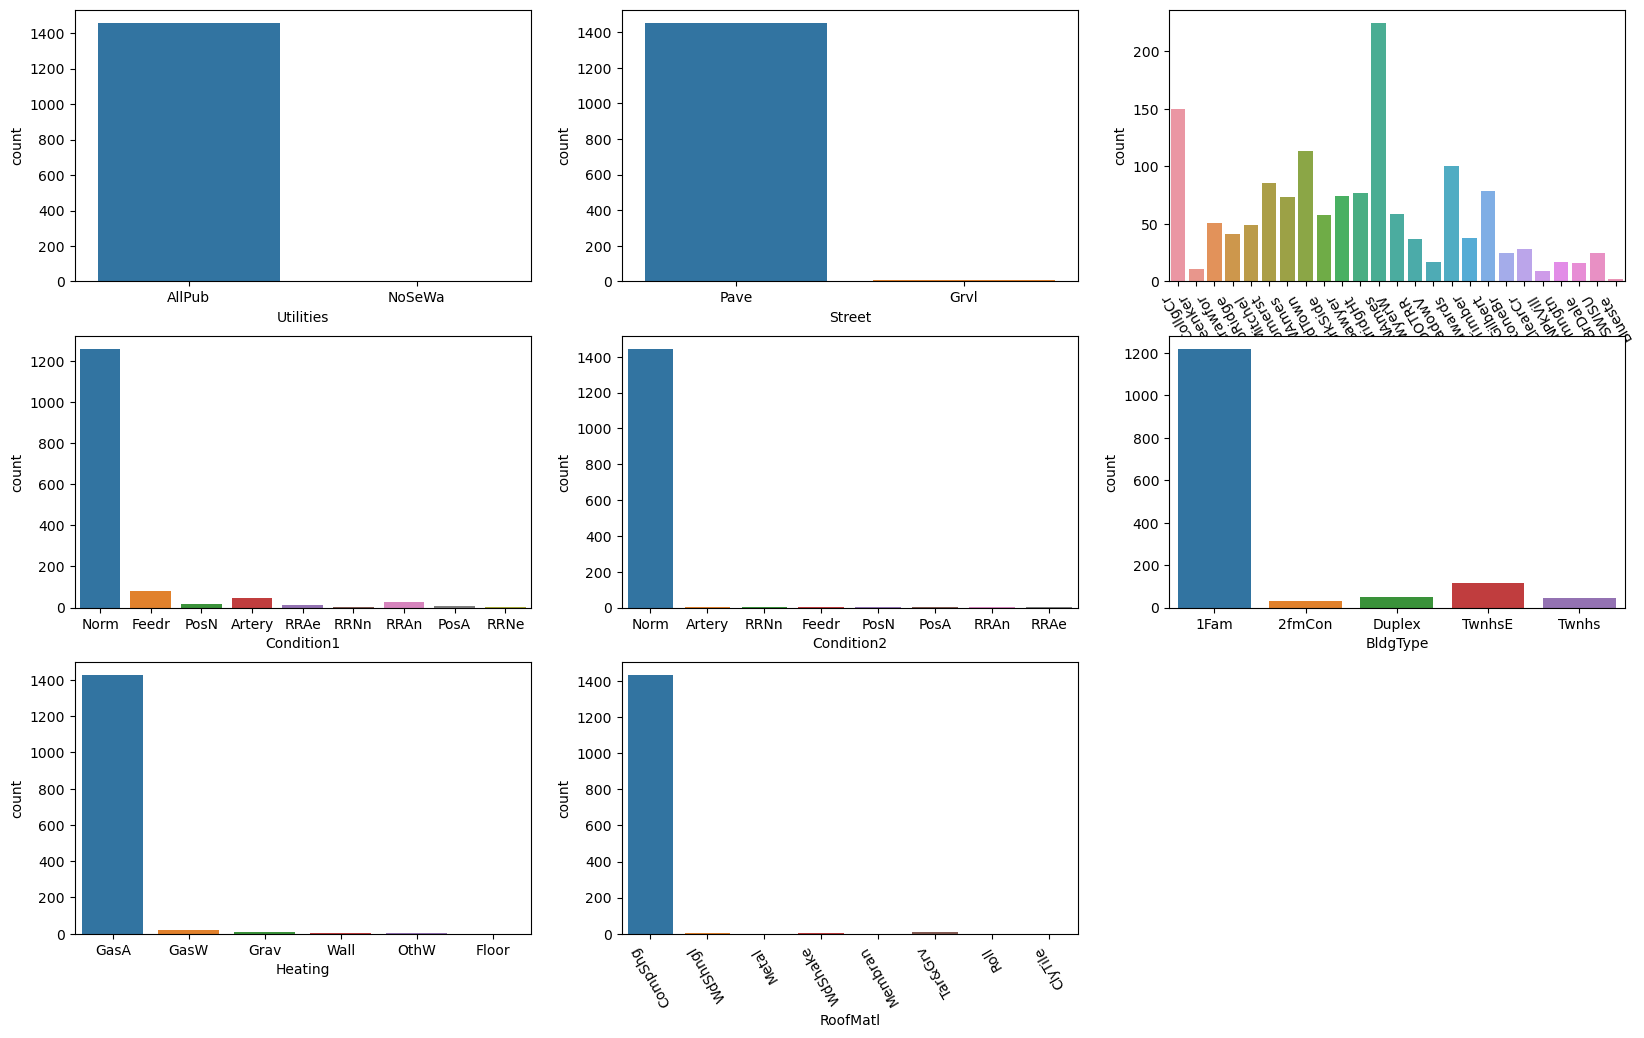

In [23]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.countplot(x = 'Utilities',  data = housingDataFiltered)
plt.subplot(3,3,2)
sns.countplot(x = 'Street', data = housingDataFiltered)
plt.subplot(3,3,3)
sns.countplot(x = 'Neighborhood', data = housingDataFiltered)
plt.xticks(rotation=120)
plt.subplot(3,3,4)
sns.countplot(x = 'Condition1', data = housingDataFiltered)
plt.subplot(3,3,5)
sns.countplot(x = 'Condition2',  data = housingDataFiltered)
plt.subplot(3,3,6)
sns.countplot(x = 'BldgType', data = housingDataFiltered)
plt.subplot(3,3,7)
sns.countplot(x = 'Heating', data = housingDataFiltered)
plt.subplot(3,3,8)
sns.countplot(x = 'RoofMatl', data = housingDataFiltered)
plt.xticks(rotation=120)
plt.show()

In [24]:
#As columns 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating' are highly skeewed, drop them
housingDataFiltered = housingDataFiltered.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature'], axis = 1)

In [25]:
# Print the dimension of data
housingDataFiltered.shape

(1460, 74)

In [26]:
# assign labels for better understanding
housingData['MoSold'] = housingData['MoSold'].map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [27]:
housingData['MoSold'].unique()

array(['feb', 'may', 'sept', 'dec', 'oct', 'aug', 'nov', 'apr', 'jan',
       'jul', 'mar', 'jun'], dtype=object)

In [28]:
# Check column types for updated dataset
distributeColumns(housingData)

Categoric columns:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


Numeric columns:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageC


## Step 3: Data Visualisation


### 3.1 Categorical variable with target variable

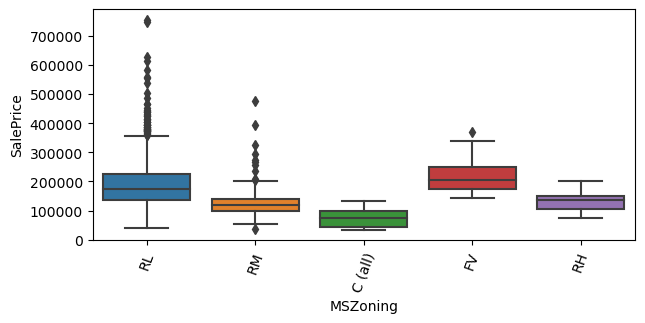

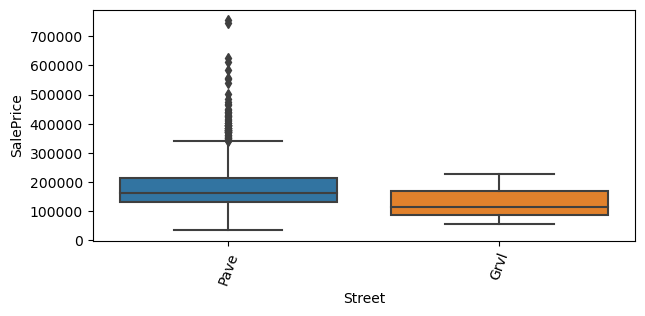

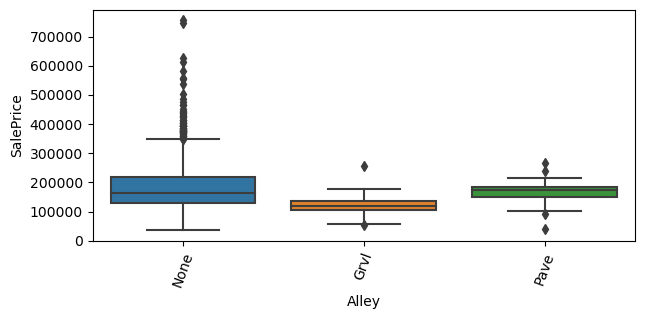

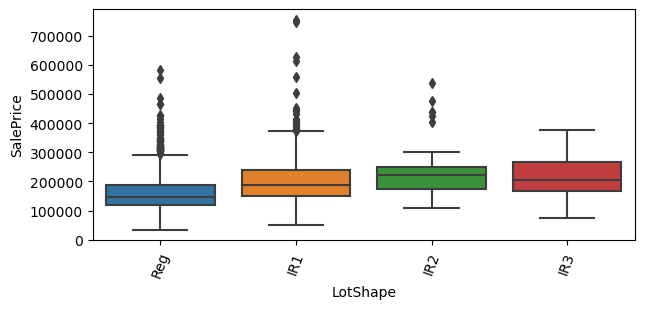

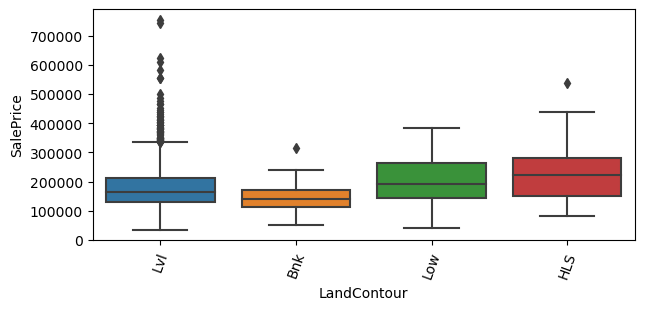

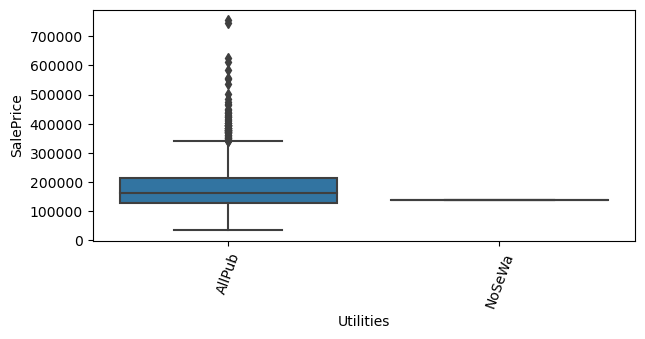

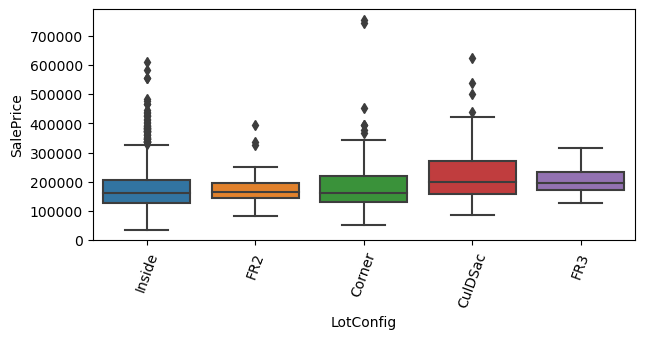

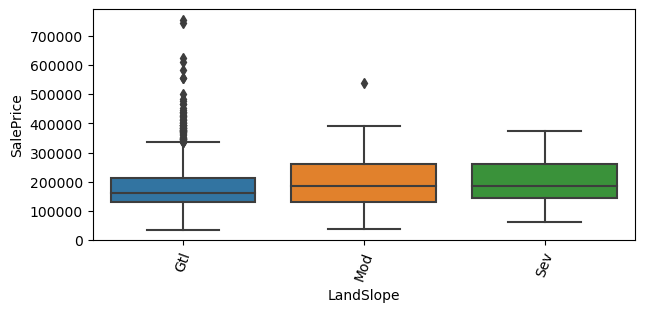

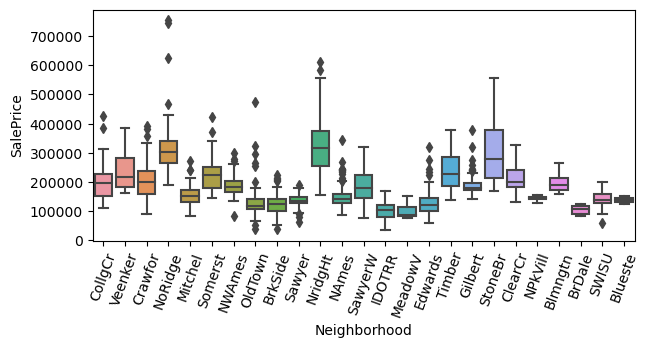

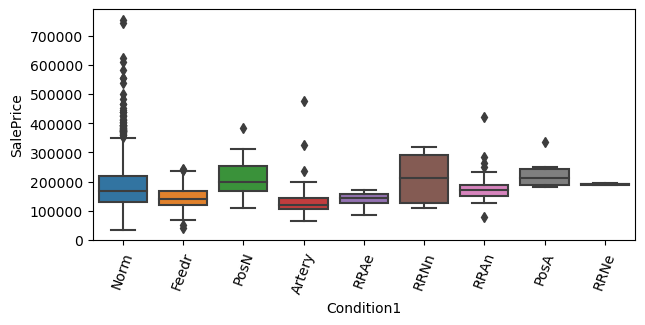

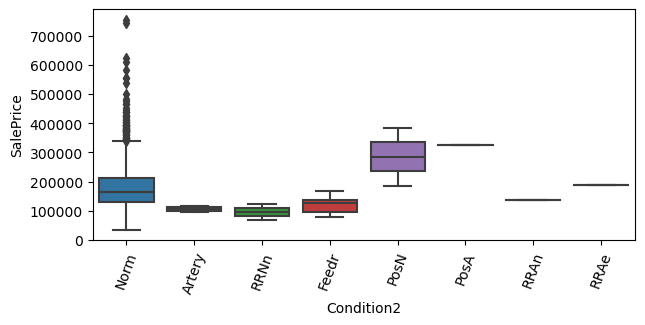

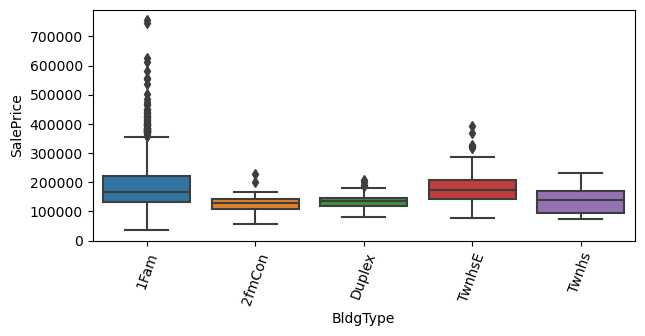

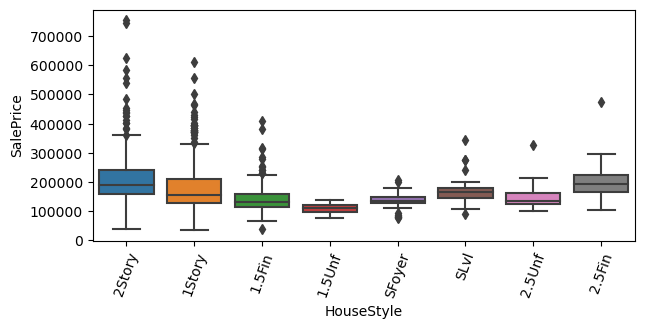

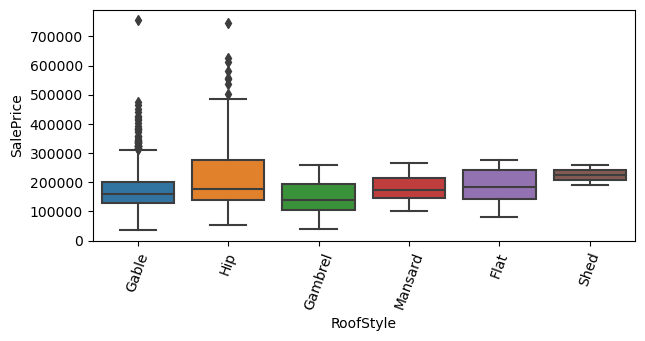

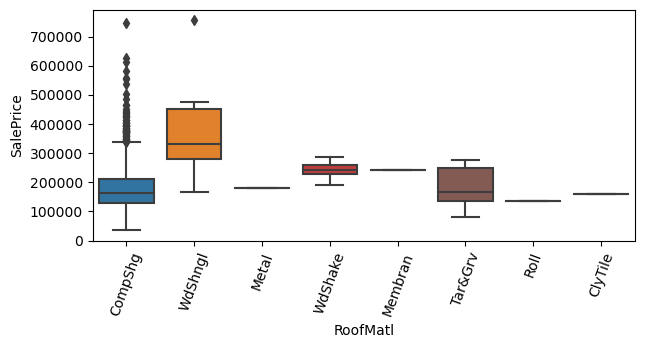

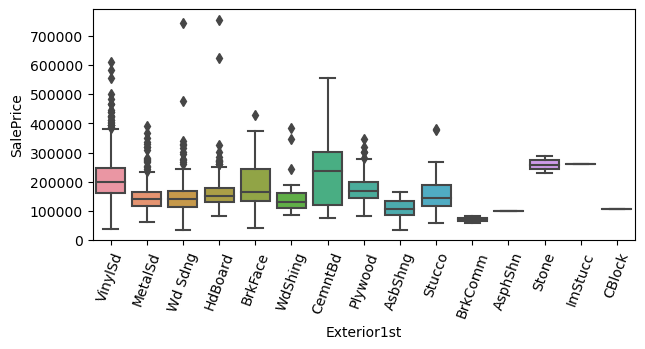

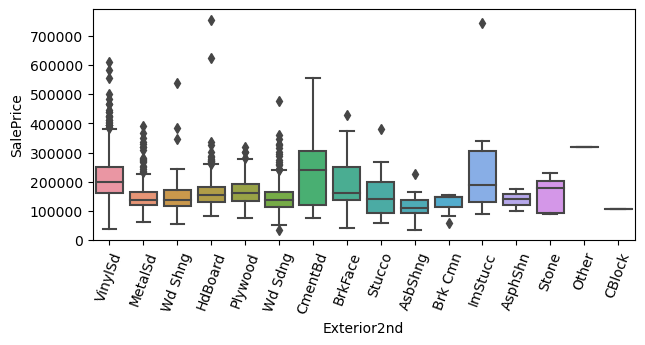

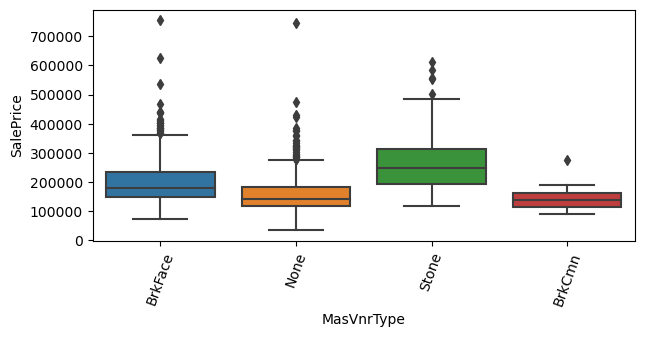

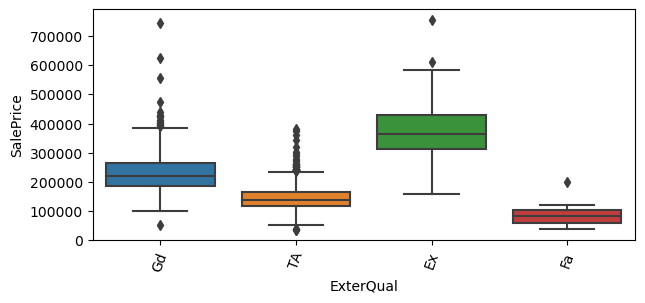

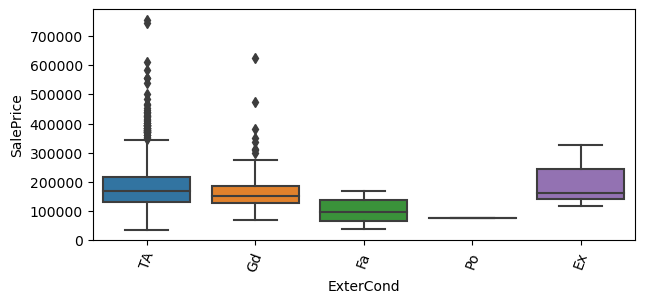

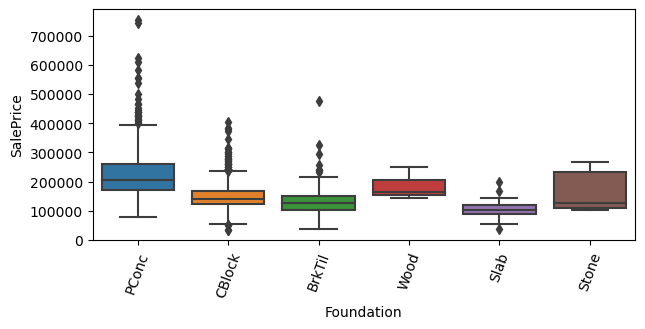

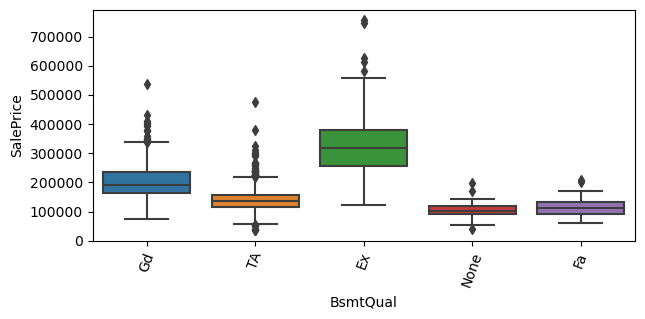

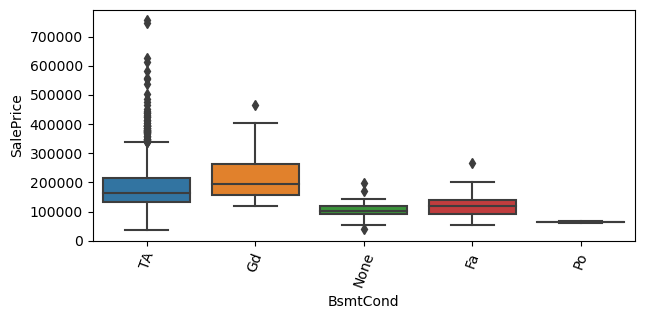

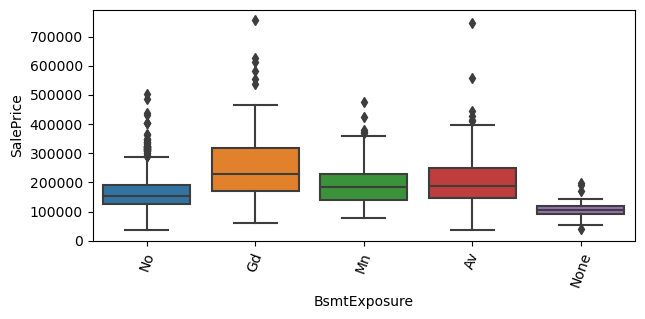

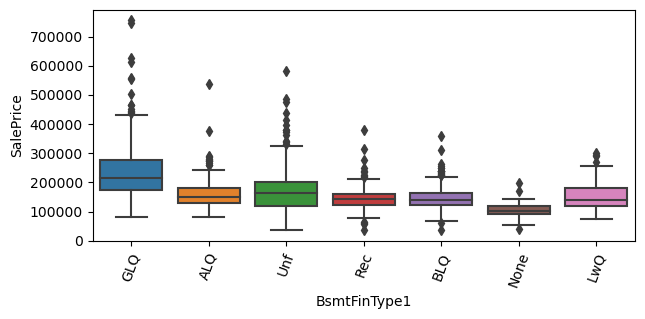

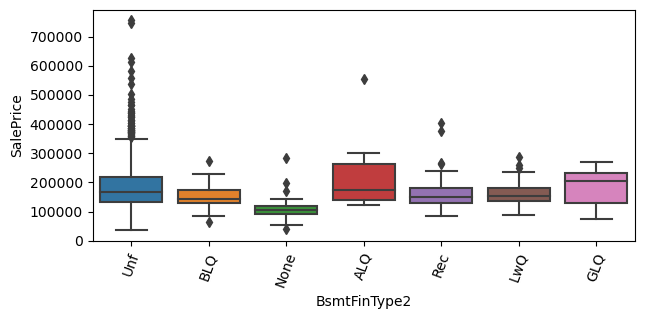

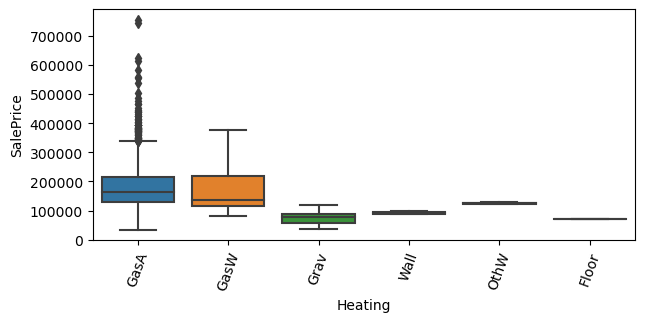

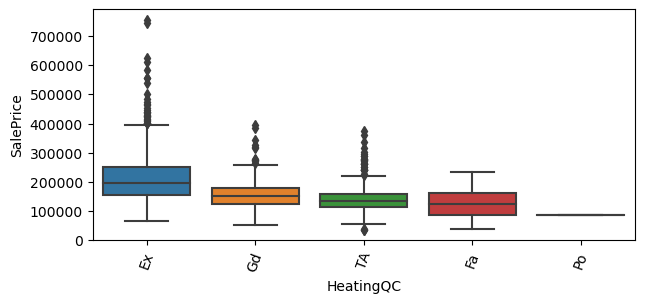

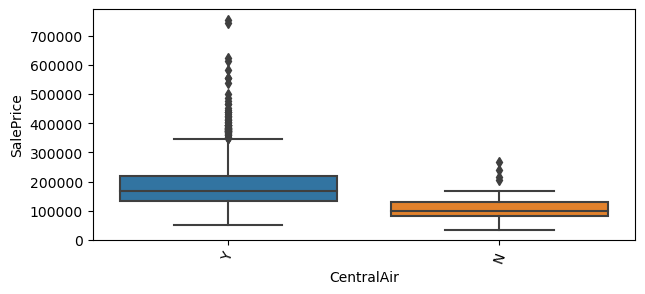

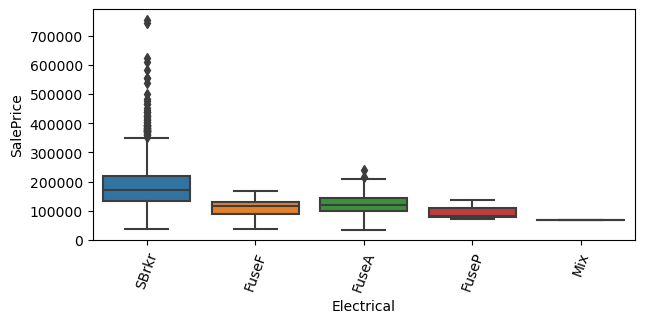

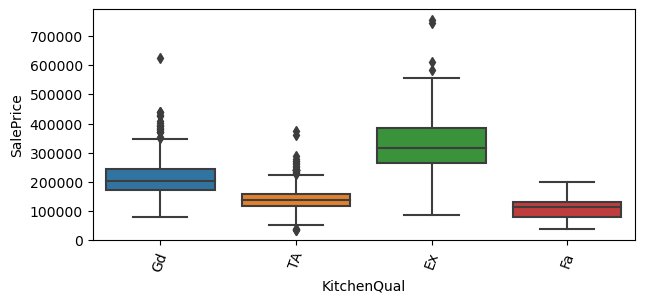

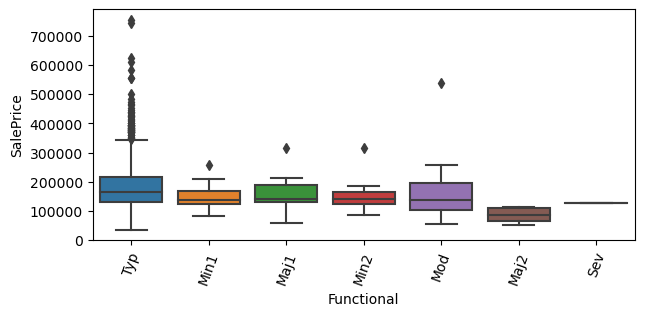

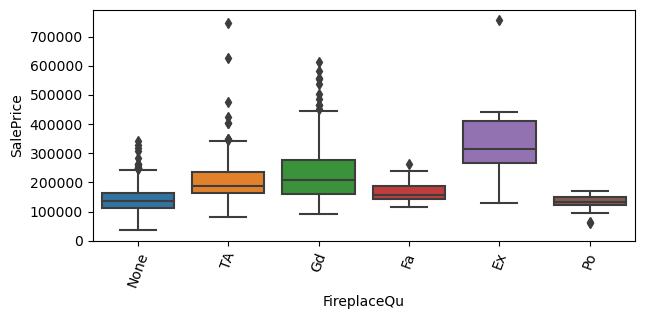

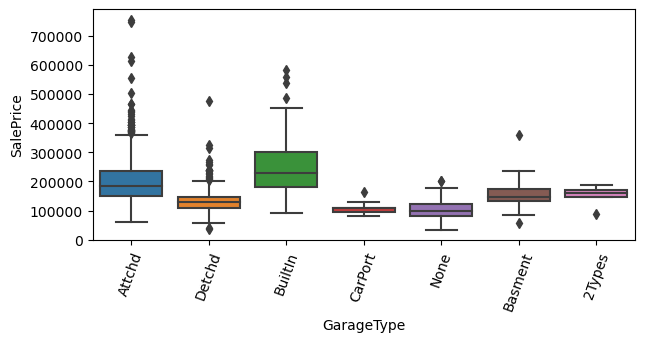

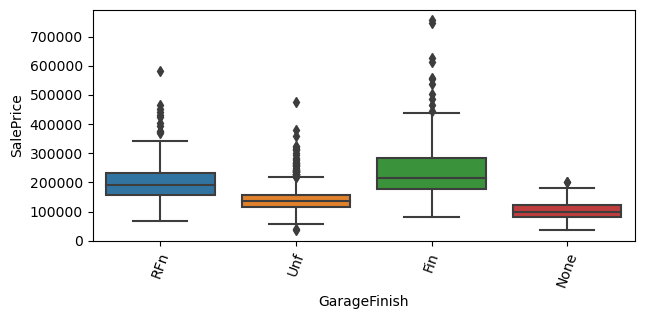

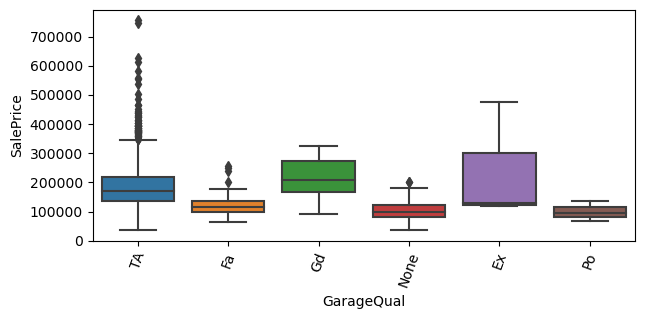

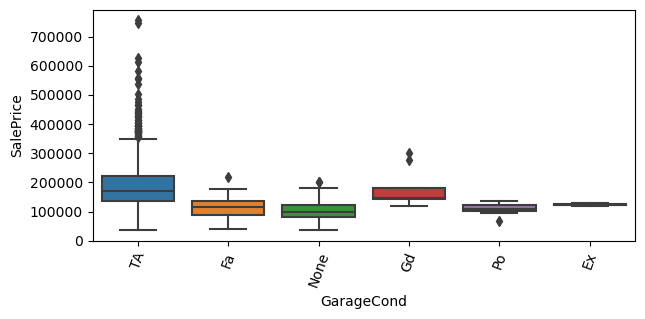

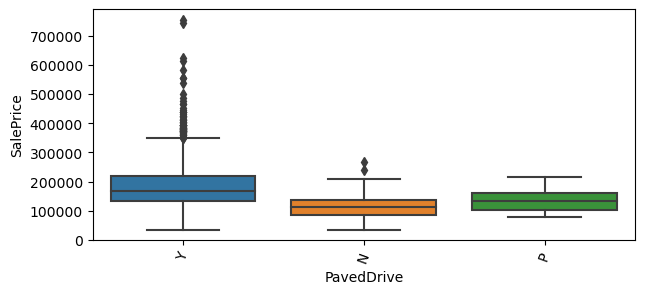

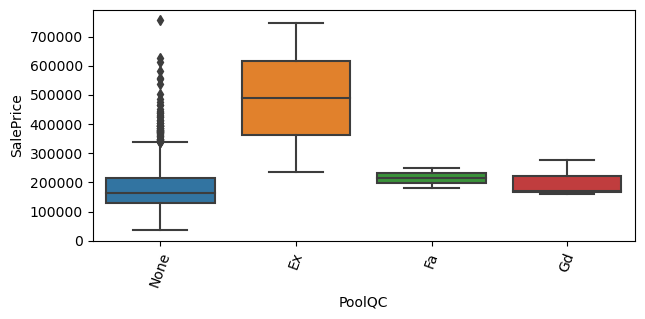

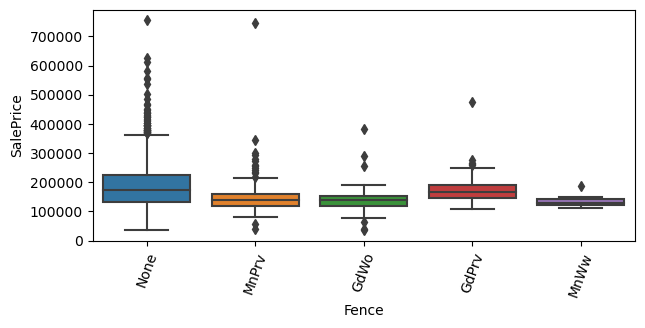

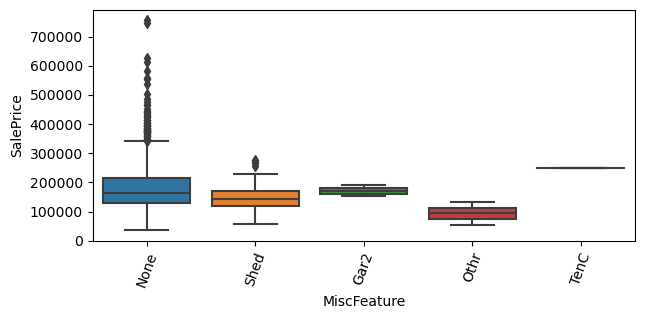

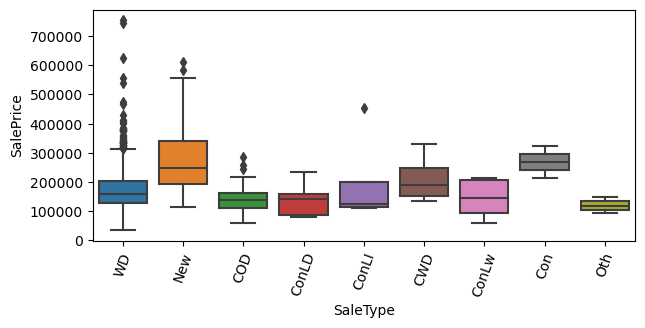

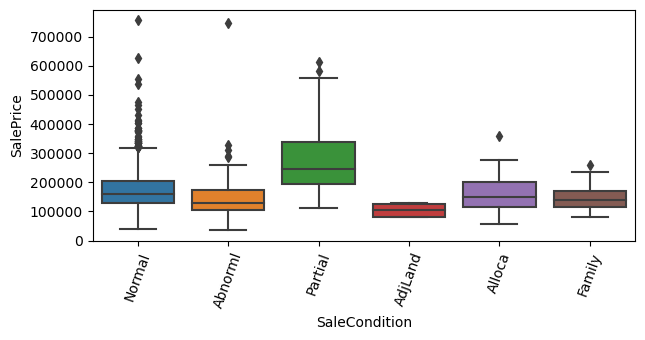

In [29]:
for col in categoricalColumns:
    plt.figure(figsize=(7,3))
    sns.boxplot(housingData, x=col, y="SalePrice")
    plt.xticks(rotation=70)
    plt.show()

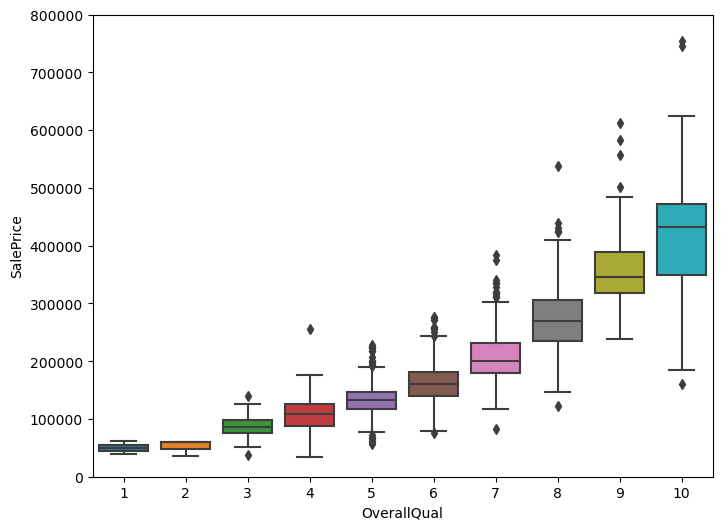

In [30]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([housingData['SalePrice'], housingData[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [31]:
#### Inference:

Few of the inferences from the above plots,
- Houses with Excellent **'OverallQual'** are sold at *high* price.
- Houses with Excellent **'ExterQual'** are sold at *high* price.
- Houses with Excellent **'ExterCond'** are sold at *high* price.
- Houses with Excellent **'BsmtQual'** are sold at *high* price.
- Houses with Excellent **'KitchenQual'** are sold at *high* price.
- **'New'** houses are sold at *high* price.

SyntaxError: invalid syntax (655338351.py, line 3)

### 3.2 Numeric variables

In [ ]:
plt.scatter(x=housingDataFiltered['home_age'], y=housingDataFiltered['SalePrice'])

In [ ]:
plt.scatter(x=housingDataFiltered['OverallQual'], y=housingDataFiltered['SalePrice'])

In [ ]:
plt.scatter(x=housingDataFiltered['YearBuilt'], y=housingDataFiltered['SalePrice'])

In [ ]:
plt.scatter(x=housingDataFiltered['PoolArea'], y=housingDataFiltered['SalePrice'])

<Axes: >

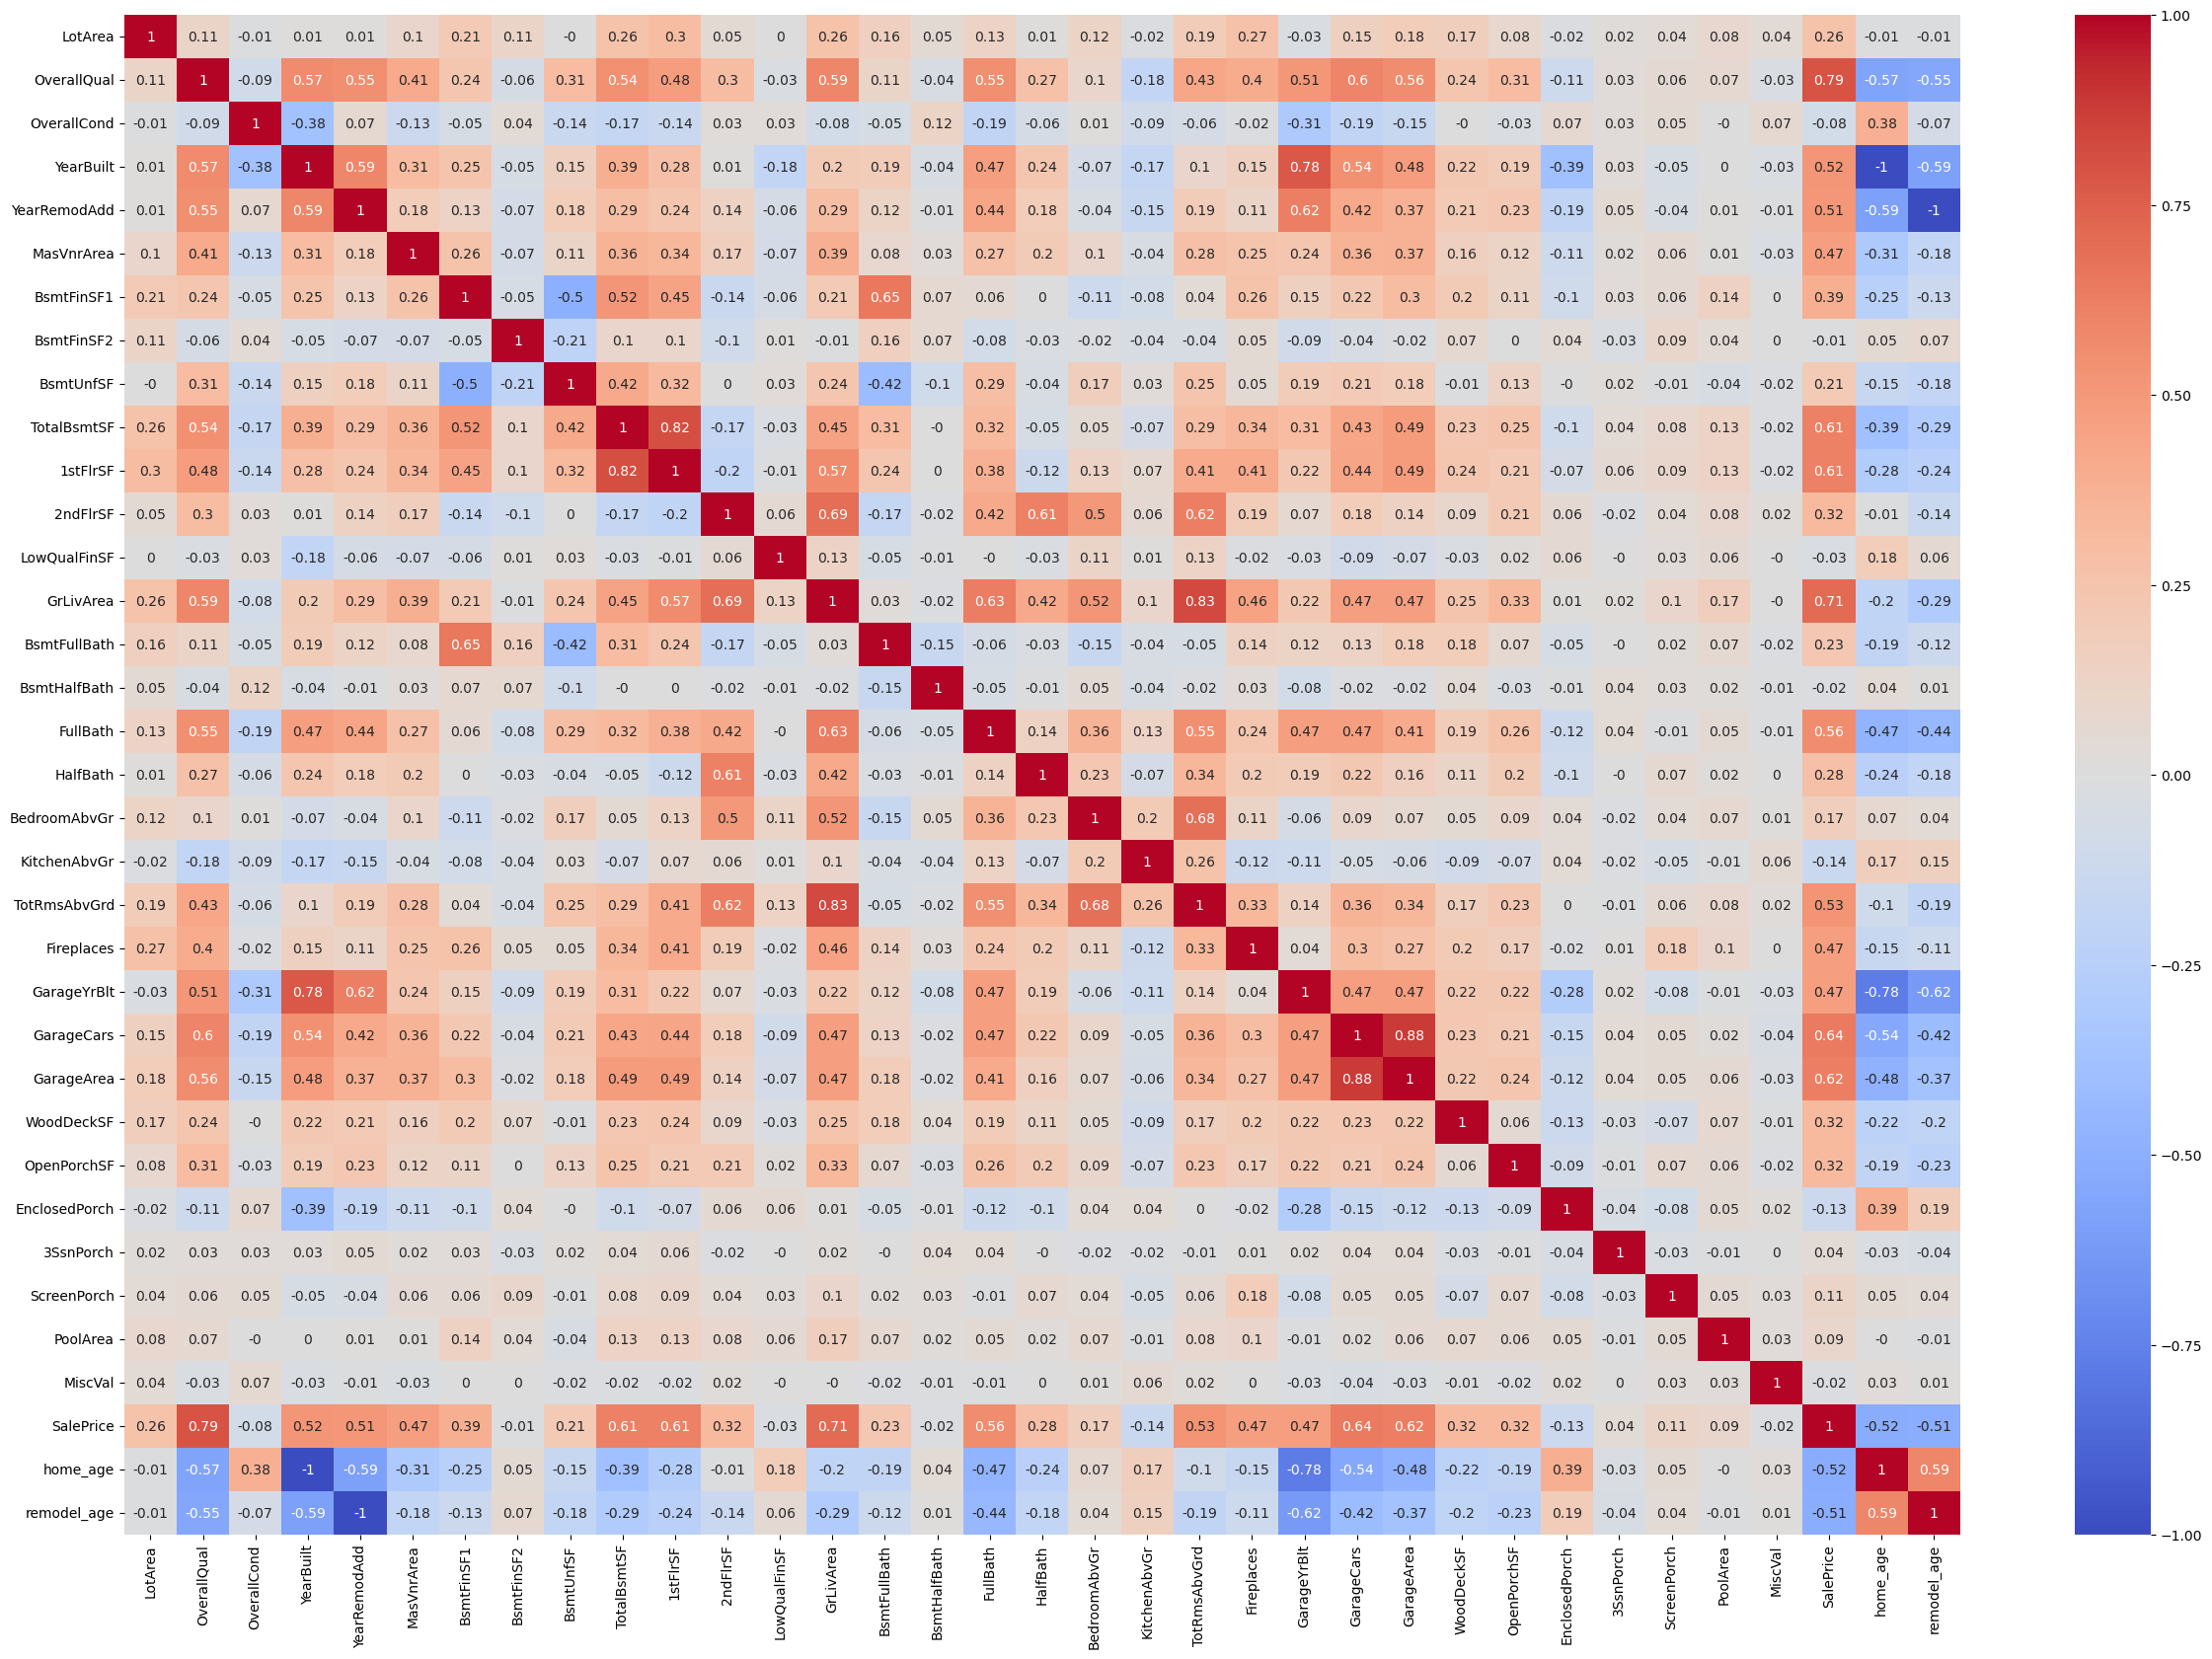

In [33]:
plt.figure(figsize=(30,20))
sns.heatmap(round(housingDataFiltered.corr(),2), cmap='coolwarm' , annot=True, center = 0)

We can conclude that **'SalePrice'** has good linear relation with the following features:
- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSf


## Step 4: Data Preparation


### Creating Dummy variables

In [34]:
categoricalCols = []
NumCols = []

for col in list(housingDataFiltered):
    if housingDataFiltered[col].dtypes == 'object':
        categoricalCols.append(col)  
    else:
        NumCols.append(col)
print('Categorical columns:\n',categoricalCols)

print('Numerical columns:\n',NumCols)

Categorical columns:
 ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Numerical columns:
 ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 

In [35]:
dummy_labels = pd.get_dummies(housingDataFiltered[categoricalCols])
dummy_labels.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,S

In [36]:
# Drop the original categorical columns
housingDataFiltered = housingDataFiltered.drop(columns=categoricalCols, axis=1)
housingDataFiltered = pd.concat([housingDataFiltered, dummy_labels], axis=1)
housingDataFiltered.shape

(1460, 299)

### Let us look into target variable

<Axes: xlabel='SalePrice', ylabel='Density'>

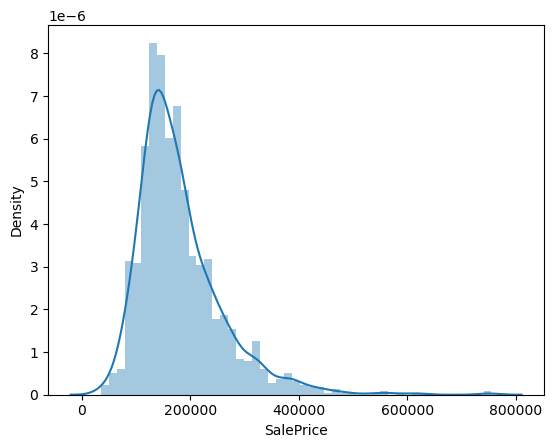

In [37]:
sns.distplot(housingDataFiltered["SalePrice"])

It appears that the target is very skewed and a transformation like a logarithm would make it more normally distributed. By transforming the prices, we can boost model performance.

In [38]:
housingDataFiltered["LogPrice"] = np.log(housingDataFiltered["SalePrice"])

In [39]:
categoricalCols = []
NumCols = []

for col in list(housingDataFiltered):
    if housingDataFiltered[col].dtypes == 'object':
        categoricalCols.append(col)  
    else:
        NumCols.append(col)
print('Categorical columns:\n',categoricalCols, '\n')

print('Numerical columns:\n',NumCols)

Categorical columns:
 [] 

Numerical columns:
 ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'home_age', 'remodel_age', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Alley_Grvl', 'Alley_None', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk


## Step 5: Splitting the Data into Training and Testing Sets

We need to split the given dataset into train and test sets

In [40]:
df_train, df_test = train_test_split(housingDataFiltered, train_size = 0.7, test_size = 0.3, random_state = 42)

In [41]:
df_train.shape

(1021, 300)

In [42]:
df_test.shape

(438, 300)

In [43]:
df_train.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,home_age,remodel_age,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageC

In [44]:
NumCols

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'home_age',
 'remodel_age',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Alley_Grvl',
 'Alley_None',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 '

### 5.1 Min Max Scaler

In [45]:
# Create a scaler object
scaler = MinMaxScaler()
# Since we need to learn and apply the learning on train data, we use fit_transform()
df_train[NumCols] = scaler.fit_transform(df_train[NumCols])

# Sample the training data
df_train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,home_age,remodel_age,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageC

In [46]:
df_test[NumCols] = scaler.transform(df_test[NumCols])
df_test.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,home_age,remodel_age,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageC

## Step 6: Building model


In [47]:
X_train = df_train.drop(["SalePrice", "LogPrice"], axis=1)
y_train = df_train["LogPrice"]

In [48]:
X_test = df_test.drop(["SalePrice", "LogPrice"], axis=1)
y_test = df_test["LogPrice"]

#### Setup model parameters :

In [49]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Set the folds
folds = 10

---
<a id='datamodel_ridge'></a>
### 6.1 Ridge

In [50]:
ridge = Ridge(random_state=100)

ridge_model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
ridge_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Ridge(random_state=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [51]:
print(ridge_model_cv.best_params_)

{'alpha': 7.0}


In [52]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.023643,0.007299,0.012033,0.004817,0.0001,{'alpha': 0.0001},0.837255,0.901438,0.765982,0.601160,0.867096,0.904445,0.811260,0.899935,0.673157,0.898836,0.816056,0.100586,25,0.933324,0.929486,0.939684,0.943319,0.932698,0.929708,0.934899,0.930024,0.937128,0.929928,0.934020,0.004506
1,0.020017,0.006269,0.010928,0.005303,0.001,{'alpha': 0.001},0.837427,0.901503,0.766114,0.601287,0.867130,0.904477,0.811355,0.899943,0.673706,0.898899,0.816184,0.100494,24,0.933324,0.929486,0.939684,0.943319,0.932698,0.929708,0.934899,0.930024,0.937128,0.929927,0.934020,0.004506
2,0.021772,0.005891,0.009460,0.005838,0.01,{'alpha': 0.01},0.838993,0.902121,0.767379,0.602551,0.867442,0.904785,0.812275,0.900013,0.679007,0.899510,0.817408,0.099595,23,0.933321,0.929484,0.939681,0.943317,0.932696,0.929706,0.934896,0.930023,0.937125,0.929926,0.934018,0.004506
3,0.022010,0.006849,0.009269,0.006683,0.05,{'alpha': 0.05},0.843764,0.904372,0.772068,0.607884,0.868466,0.905964,0.815809,0.900321,0.698955,0.901857,0.821946,0.096175,22,0.933266,0.929445,0.939638,0.943291,0.932662,0.929673,0.934854,0.929999,0.937080,0.929888,0.933980,0.004506
4,0.024824,0.005535,0.007477,0.006804,0.1,{'alpha': 0.1},0.847214,0.906408,0.776492,0.614014,0.869291,0.907107,0.819278,0.900699,0.717756,0.904161,0.826242,0.092848,21,0.933154,0.929354,0.939536,0.943228,0.932579,0.929593,0.934753,0.929939,0.936968,0.929796,0.933890,0.004505


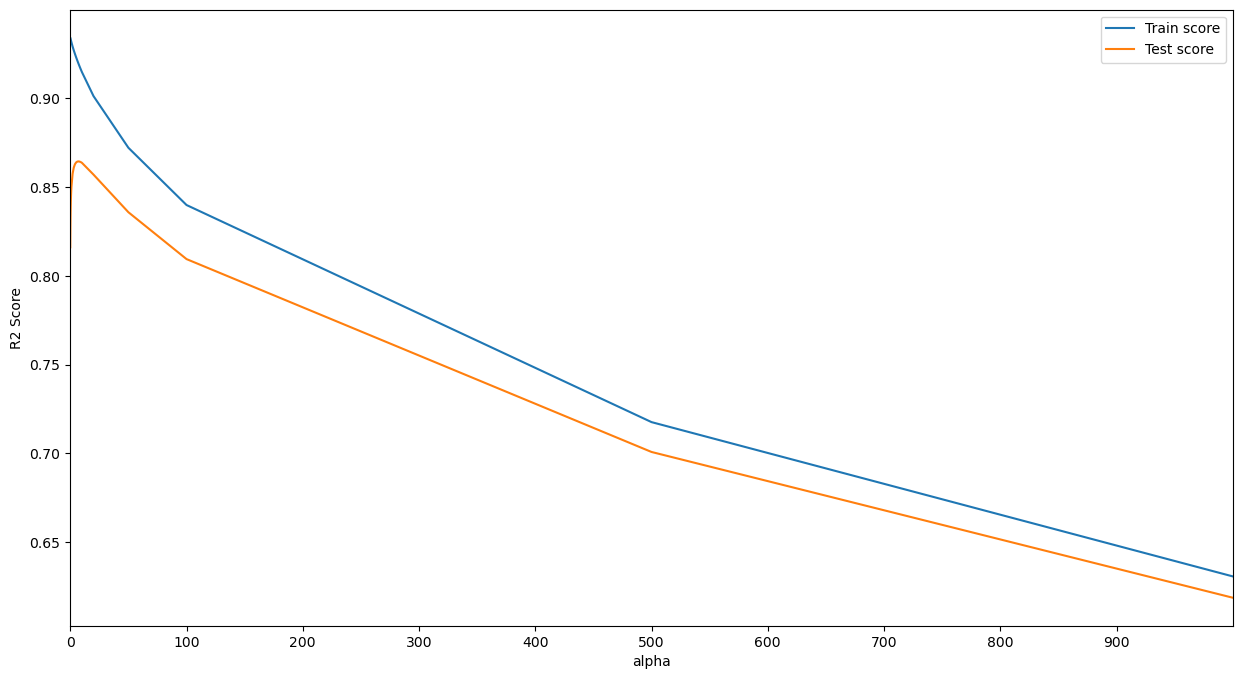

In [53]:
plt.figure(figsize=(15, 8))
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['Train score', 'Test score'], loc='upper right')
plt.xlim(0, 1000)
plt.xticks(np.arange(0, 1000, 100))
plt.show()

Looking at the graph we can see around 3 we have better performance. Let's rebuild the model using a different hyper parameter around that space.

In [54]:
params_1 = {'alpha': np.linspace(3,4,10)}

In [55]:
ridge = Ridge(random_state=100)

ridgeCVmodel = GridSearchCV(estimator = ridge,
                        param_grid = params_1,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
ridgeCVmodel.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=Ridge(random_state=100),
             param_grid={'alpha': array([3.        , 3.11111111, 3.22222222, 3.33333333, 3.44444444,
       3.55555556, 3.66666667, 3.77777778, 3.88888889, 4.        ])},
             return_train_score=True, scoring='r2', verbose=1)

In [56]:
ridgeCVmodel.best_params_

{'alpha': 4.0}

In [57]:
ridgeCVResult = pd.DataFrame(ridgeCVmodel.cv_results_)
ridgeCVResult.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.018035,0.004746,0.008871,0.005325,3.0,{'alpha': 3.0},0.862604,0.916550,0.812317,0.728646,0.874070,0.914246,0.842163,0.911482,0.827982,0.919022,0.860908,0.057742,10,0.926586,0.922533,0.932104,0.936064,0.925960,0.922830,0.927532,0.923380,0.929432,0.922785,0.926921,0.004287
1,0.020438,0.007283,0.008955,0.007465,3.111111,{'alpha': 3.111111111111111},0.862682,0.916503,0.812588,0.730236,0.874113,0.914164,0.842190,0.911616,0.828681,0.918984,0.861176,0.057312,9,0.926375,0.922312,0.931877,0.935812,0.925737,0.922603,0.927308,0.923148,0.929199,0.922563,0.926693,0.004281
2,0.019279,0.005069,0.009589,0.006964,3.222222,{'alpha': 3.2222222222222223},0.862754,0.916451,0.812844,0.731756,0.874153,0.914074,0.842205,0.911740,0.829345,0.918938,0.861426,0.056900,8,0.926165,0.922092,0.931652,0.935563,0.925516,0.922379,0.927085,0.922918,0.928967,0.922343,0.926468,0.004274
3,0.019319,0.004234,0.006619,0.004879,3.333333,{'alpha': 3.3333333333333335},0.862819,0.916394,0.813086,0.733211,0.874189,0.913978,0.842209,0.911853,0.829976,0.918886,0.861660,0.056503,7,0.925956,0.921874,0.931429,0.935315,0.925296,0.922156,0.926864,0.922690,0.928737,0.922124,0.926244,0.004268
4,0.019932,0.007441,0.010086,0.009696,3.444444,{'alpha': 3.4444444444444446},0.862878,0.916331,0.813314,0.734604,0.874222,0.913875,0.842204,0.911956,0.830576,0.918828,0.861879,0.056122,6,0.925749,0.921658,0.931208,0.935070,0.925077,0.921935,0.926644,0.922462,0.928509,0.921908,0.926022,0.004262


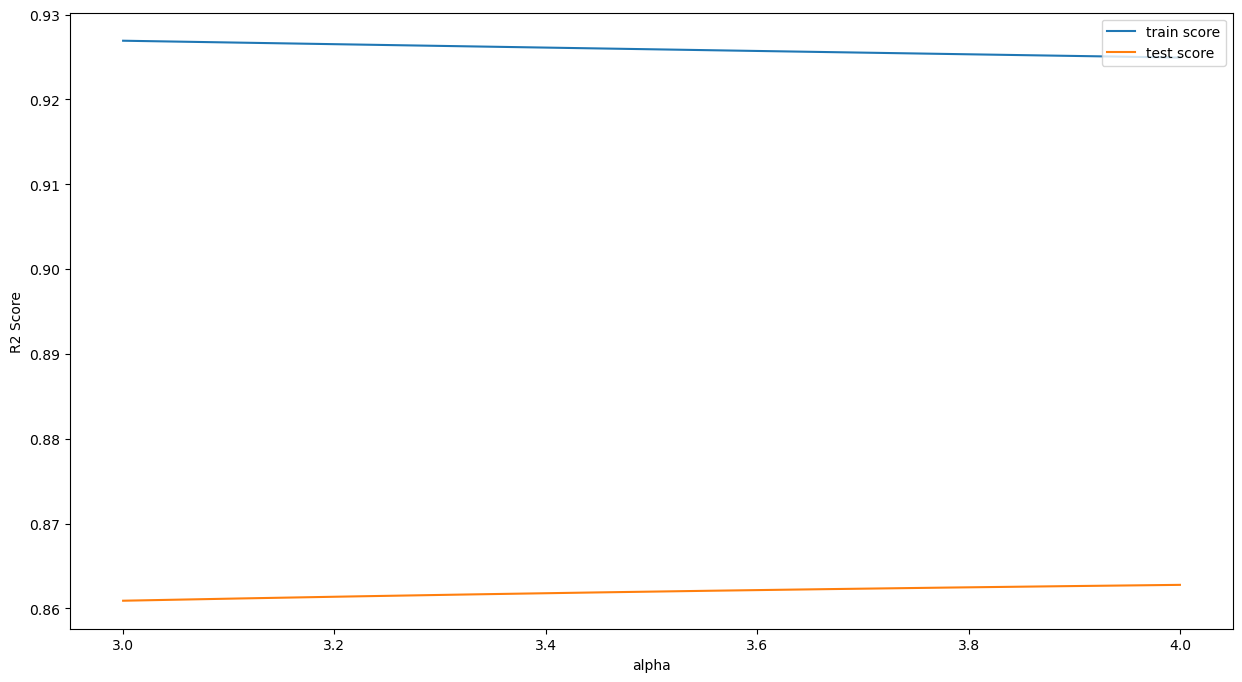

In [58]:
plt.figure(figsize=(15, 8))
plt.plot(ridgeCVResult['param_alpha'], ridgeCVResult['mean_train_score'])
plt.plot(ridgeCVResult['param_alpha'], ridgeCVResult['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [59]:
best_alpha_ridge = ridgeCVmodel.best_params_['alpha']
ridge = Ridge(alpha=best_alpha_ridge, random_state=100)

ridge.fit(X_train, y_train)

print("Ridge Intercept : ", ridge.intercept_)

Ridge Intercept :  0.2346803651637655


In [60]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score (Train): ", r2_train_lr)
ridge_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score (Test): ", r2_test_lr)
ridge_metric.append(r2_test_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train) ** 0.5
print("RMSE (Train): ", rmse_train_lr)
ridge_metric.append(rmse_train_lr)

rmse_test_lr = mean_squared_error(y_test, y_pred_test) ** 0.5
print("RMSE (Test): ", rmse_test_lr)
ridge_metric.append(rmse_test_lr)

R2 Score (Train):  0.9228100172004274
R2 Score (Test):  0.8792855850334832
RMSE (Train):  0.03575329445772052
RMSE (Test):  0.04675228258527841


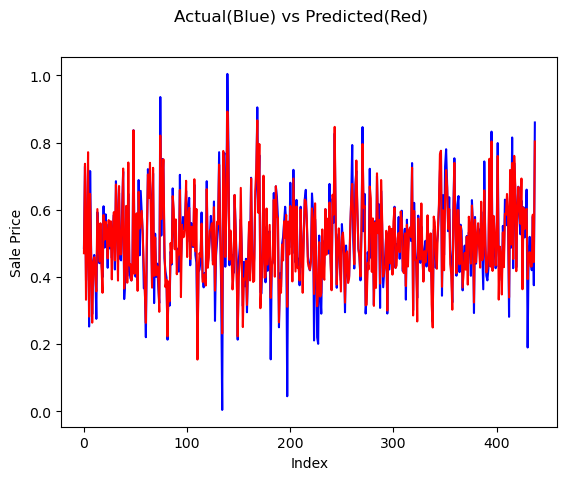

In [61]:
index = [i for i in range(0,len(X_test),1)]
plt.plot(index,y_test, color="blue")
plt.plot(index,y_pred_test, color="red")
plt.suptitle('Actual(Blue) vs Predicted(Red)')
plt.xlabel('Index')
plt.ylabel('Sale Price')
plt.show()

In [62]:
ridge_coeff = pd.DataFrame(np.atleast_2d(ridge.coef_),columns=X_train.columns)
ridge_coeff = ridge_coeff.T
ridge_coeff.rename(columns={0: "Ridge Co-Efficient"},inplace=True)
ridge_coeff.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff.head(20)

,Ridge Co-Efficient
OverallQual,0.094649
GrLivArea,0.064797
TotRmsAbvGrd,0.063054
GarageCars,0.059155
OverallCond,0.055437
2ndFlrSF,0.053943
1stFlrSF,0.050296
FullBath,0.050295
Neighborhood_StoneBr,0.047304
Exterior1st_BrkFace,0.035895


---
<a id='datamodel_lasso'></a>
### 6.2 Lasso

In [63]:
lasso = Lasso(random_state=100)


lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(random_state=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [64]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [65]:
# We select only the top 5 since the model mean scores become 0 after that alpha values
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_).head()
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.184678,0.133203,0.009356,0.006662,0.0001,{'alpha': 0.0001},0.865753,0.916112,0.797287,0.696699,0.876873,0.923862,0.854103,0.918533,0.819726,0.932336,0.860128,0.069613,1,0.923495,0.919481,0.930032,0.933938,0.922276,0.918862,0.924043,0.919727,0.926408,0.919016,0.923728,0.004831
1,0.054592,0.030000,0.009272,0.006963,0.001,{'alpha': 0.001},0.868066,0.880639,0.790895,0.762238,0.848048,0.864159,0.825156,0.884645,0.829517,0.884703,0.843807,0.039652,2,0.867150,0.865691,0.877936,0.883800,0.865745,0.864331,0.869297,0.861920,0.871574,0.864284,0.869173,0.006515
2,0.020502,0.007268,0.009988,0.008312,0.01,{'alpha': 0.01},0.510588,0.547106,0.532881,0.529890,0.507757,0.508529,0.461656,0.554190,0.616301,0.532009,0.530091,0.037870,3,0.545714,0.531922,0.539889,0.540975,0.536132,0.540402,0.554571,0.539533,0.538781,0.544836,0.541275,0.005789
3,0.017230,0.004673,0.009396,0.007672,0.05,{'alpha': 0.05},-0.001577,-0.020846,-0.000586,-0.000180,-0.003439,-0.024136,-0.000085,-0.005401,-0.001218,-0.007569,-0.006504,0.008347,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.018936,0.006295,0.006799,0.008461,0.1,{'alpha': 0.1},-0.001577,-0.020846,-0.000586,-0.000180,-0.003439,-0.024136,-0.000085,-0.005401,-0.001218,-0.007569,-0.006504,0.008347,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


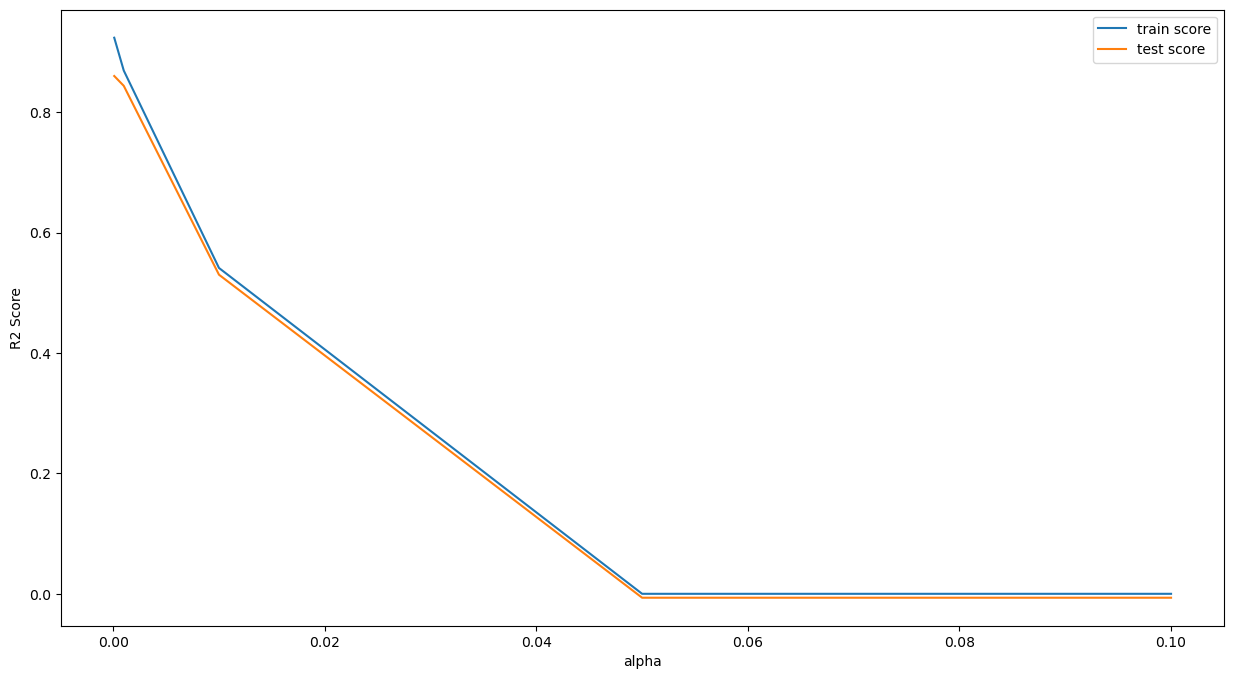

In [66]:
plt.figure(figsize=(15, 8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

Looking at the graph we can see around 0.0001 we have better performance. Let's rebuild the model using a different hyper parameter around that space.

In [67]:
params = {'alpha': np.linspace(0.00001,0.0002,10)}

In [68]:
lasso = Lasso(random_state=100)

lassoCVModel = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

lassoCVModel.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=Lasso(random_state=100),
             param_grid={'alpha': array([1.00000000e-05, 3.11111111e-05, 5.22222222e-05, 7.33333333e-05,
       9.44444444e-05, 1.15555556e-04, 1.36666667e-04, 1.57777778e-04,
       1.78888889e-04, 2.00000000e-04])},
             return_train_score=True, scoring='r2', verbose=1)

In [69]:
print(lassoCVModel.best_params_)

{'alpha': 0.0002}


In [70]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_).head()
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.184678,0.133203,0.009356,0.006662,0.0001,{'alpha': 0.0001},0.865753,0.916112,0.797287,0.696699,0.876873,0.923862,0.854103,0.918533,0.819726,0.932336,0.860128,0.069613,1,0.923495,0.919481,0.930032,0.933938,0.922276,0.918862,0.924043,0.919727,0.926408,0.919016,0.923728,0.004831
1,0.054592,0.030000,0.009272,0.006963,0.001,{'alpha': 0.001},0.868066,0.880639,0.790895,0.762238,0.848048,0.864159,0.825156,0.884645,0.829517,0.884703,0.843807,0.039652,2,0.867150,0.865691,0.877936,0.883800,0.865745,0.864331,0.869297,0.861920,0.871574,0.864284,0.869173,0.006515
2,0.020502,0.007268,0.009988,0.008312,0.01,{'alpha': 0.01},0.510588,0.547106,0.532881,0.529890,0.507757,0.508529,0.461656,0.554190,0.616301,0.532009,0.530091,0.037870,3,0.545714,0.531922,0.539889,0.540975,0.536132,0.540402,0.554571,0.539533,0.538781,0.544836,0.541275,0.005789
3,0.017230,0.004673,0.009396,0.007672,0.05,{'alpha': 0.05},-0.001577,-0.020846,-0.000586,-0.000180,-0.003439,-0.024136,-0.000085,-0.005401,-0.001218,-0.007569,-0.006504,0.008347,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.018936,0.006295,0.006799,0.008461,0.1,{'alpha': 0.1},-0.001577,-0.020846,-0.000586,-0.000180,-0.003439,-0.024136,-0.000085,-0.005401,-0.001218,-0.007569,-0.006504,0.008347,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


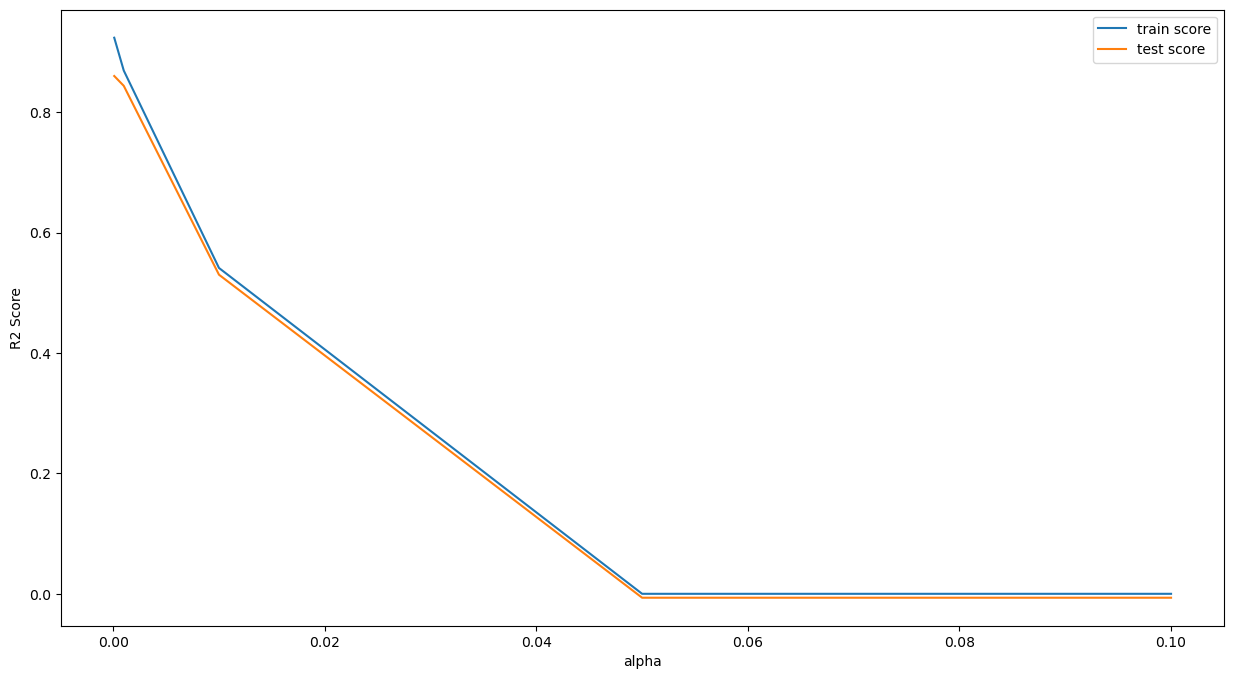

In [71]:
plt.figure(figsize=(15, 8))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [72]:
best_alpha_lasso = lasso_model_cv.best_params_['alpha']
lasso = Lasso(alpha=best_alpha_lasso, random_state=100)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, random_state=100)

In [73]:
#Display R2 and RMSE scores
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score (Train): ", r2_train_lr)
lasso_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score (Test): ", r2_test_lr)
lasso_metric.append(r2_test_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train) ** 0.5
print("RMSE (Train): ", rmse_train_lr)
lasso_metric.append(rmse_train_lr)

rmse_test_lr = mean_squared_error(y_test, y_pred_test) ** 0.5
print("RMSE (Test): ", rmse_test_lr)
lasso_metric.append(rmse_test_lr)

R2 Score (Train):  0.9204212550437754
R2 Score (Test):  0.8952559288527402
RMSE (Train):  0.036302299577551746
RMSE (Test):  0.04354998173818332


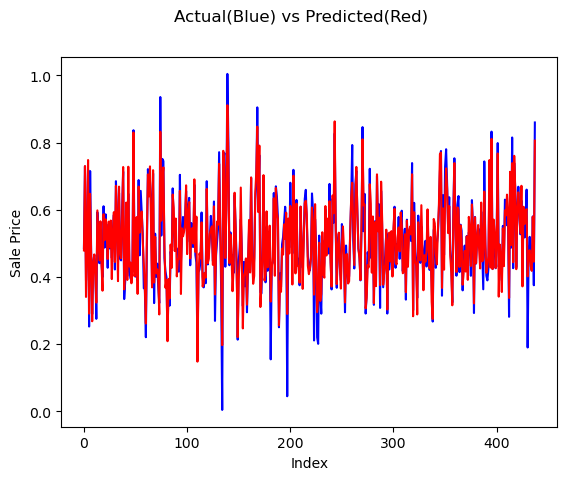

In [74]:
#Observe Actual and Predicted values
i = [i for i in range(0,len(X_test),1)]
plt.plot(i,y_test, color="blue")
plt.plot(i,y_pred_test, color="red")
plt.suptitle('Actual(Blue) vs Predicted(Red)')
plt.xlabel('Index')
plt.ylabel('Sale Price')
plt.show()

In [75]:
#Displaing the co-efficients of the model in order
lasso_coeff = pd.DataFrame(np.atleast_2d(lasso.coef_),columns=X_train.columns)
lasso_coeff = lasso_coeff.T
lasso_coeff.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff.head(20)

,Lasso Co-Efficient
GrLivArea,0.228660
OverallQual,0.153857
GarageCars,0.078450
OverallCond,0.068288
TotRmsAbvGrd,0.065692
Neighborhood_StoneBr,0.053020
FullBath,0.041579
Neighborhood_Crawfor,0.037886
Exterior1st_BrkFace,0.036646
BsmtFullBath,0.036312


## Conclusion

In [76]:
table = {'Metric': ['R2 Score (Train)','R2 Score (Test)', 'RMSE (Train)','RMSE (Test)']}

lr_metric = pd.DataFrame(table ,columns = ['Metric'] )

rg_metric = pd.Series(ridge_metric, name = 'Ridge')
ls_metric = pd.Series(lasso_metric, name = 'Lasso')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge,Lasso
0,R2 Score (Train),0.922810,0.920421
1,R2 Score (Test),0.879286,0.895256
2,RMSE (Train),0.035753,0.036302
3,RMSE (Test),0.046752,0.043550


#### Observe number of features in Ridge and Lasso models

In [77]:
print("Count of features in the input data: ", X_train.shape[1])

ridgeFeatures = ridge_coeff[ridge_coeff['Ridge Co-Efficient'] != 0]
print("Count of features selected by Ridge model: ", len(ridgeFeatures.index))

lasso_selected_features = lasso_coeff[lasso_coeff['Lasso Co-Efficient'] != 0]
print("Count of features selected by Lasso model: ", len(lasso_selected_features.index))

Count of features in the input data:  298
Count of features selected by Ridge model:  296
Count of features selected by Lasso model:  161


#### Let's observe the top 20 features between Ridge and Lasso model

In [78]:
topFeatures = pd.DataFrame()
topFeatures['Ridge Features'] = ridge_coeff.index
topFeatures['Lasso Features'] = lasso_coeff.index
# the top 10 features
topFeatures.head(10)

,Ridge Features,Lasso Features
0,OverallQual,GrLivArea
1,GrLivArea,OverallQual
2,TotRmsAbvGrd,GarageCars
3,GarageCars,OverallCond
4,OverallCond,TotRmsAbvGrd
5,2ndFlrSF,Neighborhood_StoneBr
6,1stFlrSF,FullBath
7,FullBath,Neighborhood_Crawfor
8,Neighborhood_StoneBr,Exterior1st_BrkFace
9,Exterior1st_BrkFace,BsmtFullBath


We could see the following few features play important role *(no order)* in any of the model:
   - OverallQual
   - GrLivArea
   - GarageCars
   - GarageArea
- Total_floor_SF
 - TotalBsmtSF
 - OverallCond
 - Neighborhood
 - Total_Bathrooms 




>- Both the models have same R2 score approximately 0.93 for train data and same around 0.90 for test data and RMSE value is same around 0.037 for train data and same around 0.045 for test data, it is better to select a model which is simple.
>- In that terms, lasso model does better job since it does feature selection which resulted in less features than Ridge



# Subjective Questions - Demonstration/Validation


### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [79]:
print("Optimal value for Ridge is ", str(best_alpha_ridge), " and Lasso is", str(best_alpha_lasso))

Optimal value for Ridge is  4.0  and Lasso is 0.0001


#### Double the Alpha values:

### Ridge

In [80]:
alpha_double = 2 * best_alpha_ridge
ridgeDouble = Ridge(alpha=alpha_double, random_state=100)

ridgeDouble.fit(X_train, y_train)

Ridge(alpha=8.0, random_state=100)

In [81]:
y_pred_train = ridgeDouble.predict(X_train)
y_pred_test = ridgeDouble.predict(X_test)

ridgeDoubleMetric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score (Train) : ", r2_train_lr)
ridgeDoubleMetric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score (Test): ", r2_test_lr)
ridgeDoubleMetric.append(r2_test_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train) ** 0.5
print("RMSE (Train): ", rmse_train_lr)
ridgeDoubleMetric.append(rmse_train_lr)

rmse_test_lr = mean_squared_error(y_test, y_pred_test) ** 0.5
print("RMSE (Test): ", rmse_test_lr)
ridgeDoubleMetric.append(rmse_test_lr)

R2 Score (Train) :  0.9165570334480639
R2 Score (Test):  0.8758742962131395
RMSE (Train):  0.0371732439217904
RMSE (Test):  0.04740827073445509


In [82]:
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double.coef_),columns=X_train.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: "Ridge Double Co-Efficient"},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Double Co-Efficient'], ascending=False,inplace=True)
ridge_double_coeff.head(20)

NameError: name 'ridge_double' is not defined

### Lasso

In [ ]:
alpha_double = 2 * best_alpha_lasso
lasso_double = Lasso(alpha=alpha_double, random_state=100)
lasso_double.fit(X_train, y_train)

In [ ]:
y_pred_train = lasso_double.predict(X_train)
y_pred_test = lasso_double.predict(X_test)

lasso_double_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Score (Train) : ", r2_train_lr)
lasso_double_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Score (Test)  : ", r2_test_lr)
lasso_double_metric.append(r2_test_lr)

rmse_train_lr = mean_squared_error(y_train, y_pred_train) ** 0.5
print("RMSE (Train)     : ", rmse_train_lr)
lasso_double_metric.append(rmse_train_lr)

rmse_test_lr = mean_squared_error(y_test, y_pred_test) ** 0.5
print("RMSE (Test)      : ", rmse_test_lr)
lasso_double_metric.append(rmse_test_lr)

In [ ]:
lasso_double_coef = pd.DataFrame(np.atleast_2d(lasso_double.coef_),columns=X_train.columns)
lasso_double_coef = lasso_double_coef.T
lasso_double_coef.rename(columns={0: "Lasso Double Co-efficient"},inplace=True)
lasso_double_coef.sort_values(by=['Lasso Double Co-efficient'], ascending=False,inplace=True)
lasso_double_coef.head(10)

## Question 3


#### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [83]:
#Let's remove top 5 features from our model namely :  OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF
X_train_drop = X_train.drop(columns=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'], axis=1)
X_test_drop = X_test.drop(columns=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'], axis=1)

In [84]:
X_test_rfe3 = X_train.drop(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'],axis=1)
X_train_rfe3 = X_train.drop(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'],axis=1)

lasso3 = Lasso(alpha=0.0001,random_state=100)
lasso3.fit(X_train_rfe3,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_rfe3)
print('R2 Score on test dataset - ',r2_score(y_test, y_pred_test))
print('MSE on the test dataset - ', mean_squared_error(y_test, y_pred_test))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

R2 Score on test dataset -  0.8758742962131395
MSE on the test dataset -  0.0022475441340313908
The most important predictor variables are as follows:


,Lasso Co-Efficient
1stFlrSF,0.243433
2ndFlrSF,0.125495
OverallCond,0.086183
TotRmsAbvGrd,0.071939
Neighborhood_StoneBr,0.067348


After dropping the previous top five predictors, top most five important variables from the lasso model are:
- 1stFlrSF
- 2ndFlrSF
- OverallCond
- TotRmsAbvGrd
- Neighborhood_StoneBr